In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Preprocessing the Data

In [15]:
file_path = '30_assets_five_year_monthly.xlsx'
df = pd.read_excel(file_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Asset
0,2019-01-01,1028.852905,1156.356567,988.485107,1122.023438,1099.465454,233775890,RELIANCE.NS
1,2019-02-01,1128.286621,1208.016357,1102.685303,1125.589233,1102.959717,190756815,RELIANCE.NS
2,2019-03-01,1131.029541,1269.093750,1114.205811,1246.464111,1221.404419,204177832,RELIANCE.NS
3,2019-04-01,1252.635864,1291.403564,1207.833496,1273.482666,1247.879639,182588509,RELIANCE.NS
4,2019-05-01,1273.482666,1296.066650,1122.343384,1216.199707,1191.748413,268176997,RELIANCE.NS


In [16]:
df['Asset'].value_counts()

,count
Asset,
RELIANCE.NS,60
TCS.NS,60
DRREDDY.NS,60
POWERGRID.NS,60
NESTLEIND.NS,60
TECHM.NS,60
JSWSTEEL.NS,60
HEROMOTOCO.NS,60
M&M.NS,60


In [17]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Asset'], dtype='object')

In [18]:
asset_groups = df.groupby('Asset')
asset_dfs = {asset: group.drop('Asset', axis=1) for asset, group in asset_groups}

final_assets = []

for asset, asset_df in asset_dfs.items():
    asset_df['Return'] = asset_df['Adj Close'] - asset_df['Adj Close'].shift(1)
    asset_df['Rate_Return'] = (asset_df['Return']/asset_df['Adj Close'].shift(1))
    asset_df['Asset'] = asset
    asset_df['Expected_Rate_return'] = asset_df['Rate_Return'].mean()
    final_assets.append(asset_df)

In [19]:
df_return = pd.concat(final_assets, ignore_index=True)

In [20]:
df_return

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Rate_Return,Asset,Expected_Rate_return
0,2019-01-01,386.299988,402.700012,292.100006,338.649994,326.550171,84534851,NaN,NaN,ADANIPORTS.NS,0.024666
1,2019-02-01,339.899994,359.250000,315.750000,325.850006,314.207550,133558828,-12.342621,-0.037797,ADANIPORTS.NS,0.024666
2,2019-03-01,328.799988,385.899994,327.000000,378.149994,364.638855,70090763,50.431305,0.160503,ADANIPORTS.NS,0.024666
3,2019-04-01,380.950012,396.549988,373.000000,392.799988,378.765411,45592283,14.126556,0.038741,ADANIPORTS.NS,0.024666
4,2019-05-01,392.799988,430.600006,359.100006,416.399994,401.522186,119239950,22.756775,0.060081,ADANIPORTS.NS,0.024666
...,...,...,...,...,...,...,...,...,...,...,...
1795,2023-08-01,405.500000,422.149994,397.049988,408.399994,407.530853,89878246,3.342865,0.008271,WIPRO.NS,0.012896
1796,2023-09-01,407.950012,443.750000,401.500000,406.049988,405.185852,122356840,-2.345001,-0.005754,WIPRO.NS,0.012896
1797,2023-10-01,406.049988,423.950012,375.049988,381.799988,380.987457,86138382,-24.198395,-0.059722,WIPRO.NS,0.012896
1798,2023-11-01,383.850006,414.500000,377.000000,413.049988,412.170959,83436868,31.183502,0.081849,WIPRO.NS,0.012896


In [21]:
df_return['Return'] = df_return['Return'].fillna(0)

In [23]:
df_return

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Rate_Return,Asset,Expected_Rate_return
0,2019-01-01,386.299988,402.700012,292.100006,338.649994,326.550171,84534851,0.000000,NaN,ADANIPORTS.NS,0.024666
1,2019-02-01,339.899994,359.250000,315.750000,325.850006,314.207550,133558828,-12.342621,-0.037797,ADANIPORTS.NS,0.024666
2,2019-03-01,328.799988,385.899994,327.000000,378.149994,364.638855,70090763,50.431305,0.160503,ADANIPORTS.NS,0.024666
3,2019-04-01,380.950012,396.549988,373.000000,392.799988,378.765411,45592283,14.126556,0.038741,ADANIPORTS.NS,0.024666
4,2019-05-01,392.799988,430.600006,359.100006,416.399994,401.522186,119239950,22.756775,0.060081,ADANIPORTS.NS,0.024666
...,...,...,...,...,...,...,...,...,...,...,...
1795,2023-08-01,405.500000,422.149994,397.049988,408.399994,407.530853,89878246,3.342865,0.008271,WIPRO.NS,0.012896
1796,2023-09-01,407.950012,443.750000,401.500000,406.049988,405.185852,122356840,-2.345001,-0.005754,WIPRO.NS,0.012896
1797,2023-10-01,406.049988,423.950012,375.049988,381.799988,380.987457,86138382,-24.198395,-0.059722,WIPRO.NS,0.012896
1798,2023-11-01,383.850006,414.500000,377.000000,413.049988,412.170959,83436868,31.183502,0.081849,WIPRO.NS,0.012896


In [24]:
df_return['Rate_Return'] = df_return['Rate_Return'].fillna(0)

In [25]:
df_return.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'Rate_Return', 'Asset', 'Expected_Rate_return'],
      dtype='object')

In [26]:
df_return['Deviation'] = df_return['Return'] - df_return['Expected_Rate_return']

In [67]:
df_return

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Rate_Return,Asset,Expected_Rate_return,Deviation
0,2019-01-01,386.299988,402.700012,292.100006,338.649994,326.550171,84534851,0.000000,0.000000,ADANIPORTS.NS,0.024666,-0.024666
1,2019-02-01,339.899994,359.250000,315.750000,325.850006,314.207550,133558828,-12.342621,-0.037797,ADANIPORTS.NS,0.024666,-12.367286
2,2019-03-01,328.799988,385.899994,327.000000,378.149994,364.638855,70090763,50.431305,0.160503,ADANIPORTS.NS,0.024666,50.406639
3,2019-04-01,380.950012,396.549988,373.000000,392.799988,378.765411,45592283,14.126556,0.038741,ADANIPORTS.NS,0.024666,14.101891
4,2019-05-01,392.799988,430.600006,359.100006,416.399994,401.522186,119239950,22.756775,0.060081,ADANIPORTS.NS,0.024666,22.732109
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2023-08-01,405.500000,422.149994,397.049988,408.399994,407.530853,89878246,3.342865,0.008271,WIPRO.NS,0.012896,3.329969
1796,2023-09-01,407.950012,443.750000,401.500000,406.049988,405.185852,122356840,-2.345001,-0.005754,WIPRO.NS,0.012896,-2.357897
1797,2023-10-01,406.049988,423.950012,375.049988,381.799988,380.987457,86138382,-24.198395,-0.059722,WIPRO.NS,0.012896,-24.211291
1798,2023-11-01,383.850006,414.500000,377.000000,413.049988,412.170959,83436868,31.183502,0.081849,WIPRO.NS,0.012896,31.170606


In [29]:
combined_df = pd.DataFrame()
expected_return_df=[]
asset_groups = df_return.groupby('Asset')
for asset, asset_df in asset_groups:
    cov_df = asset_df[['Deviation']]
    expected_return_df.append(asset_df[['Expected_Rate_return']].iloc[0])
    cov_df = cov_df.reset_index(drop=True)
    cov_df = cov_df.rename(columns={'Deviation': f'{asset}_deviation'})
    combined_df = pd.concat([combined_df, cov_df], axis=1)

In [68]:
mu = np.array(expected_return_df)


In [31]:
combined_df

,ADANIPORTS.NS_deviation,ASIANPAINT.NS_deviation,AXISBANK.NS_deviation,BAJFINANCE.NS_deviation,BHARTIARTL.NS_deviation,BRITANNIA.NS_deviation,DRREDDY.NS_deviation,HCLTECH.NS_deviation,HDFCBANK.NS_deviation,HEROMOTOCO.NS_deviation,...,ONGC.NS_deviation,POWERGRID.NS_deviation,RELIANCE.NS_deviation,SBIN.NS_deviation,SUNPHARMA.NS_deviation,TCS.NS_deviation,TECHM.NS_deviation,TITAN.NS_deviation,ULTRACEMCO.NS_deviation,WIPRO.NS_deviation
0,-0.024666,-0.018331,-0.013223,-0.027750,-0.025161,-0.012497,-0.016134,-0.024218,-0.011617,-0.014599,...,-0.017182,-0.020622,-0.017718,-0.020520,-0.022376,-0.014413,-0.016159,-0.026784,-0.021728,-0.012896
1,-12.367286,-7.093160,-13.090005,72.759848,10.285539,-126.718063,-85.741476,20.538678,-1.153951,11.920948,...,5.223823,-2.377166,3.476544,-23.175092,20.456720,-23.365732,82.742691,28.431102,299.014405,0.530439
2,50.406639,83.634379,67.309470,369.063803,13.294663,25.724564,142.875712,15.022321,114.862467,-22.162548,...,12.005370,6.147362,118.426984,48.641803,31.781640,16.119254,-45.712448,112.884715,167.288575,-21.438067
3,14.101891,-28.269064,-10.355264,69.618735,13.907914,-170.498093,147.587870,40.545758,-0.701803,-35.513866,...,7.709907,-2.376243,26.457501,-10.185986,-20.029639,229.315298,50.691910,16.138011,602.090577,42.837232
4,22.732109,-53.412740,41.205771,364.303305,27.446153,23.295364,-245.606222,-38.436541,51.345195,144.735157,...,2.014922,1.204575,-56.148944,40.029407,-45.133063,-56.570810,-63.822556,74.699291,139.492921,-11.913012
5,-6.003151,-47.006857,0.235434,210.040610,-2.097518,-160.419235,-123.002951,-10.981799,8.746073,-84.896190,...,-3.120751,7.415017,-69.050799,8.215411,-8.421668,27.155386,-45.291184,95.751781,-198.876220,-5.791491
6,-31.508033,163.612894,-133.713968,-421.194742,-8.748519,-124.828171,23.206278,-12.781756,-84.783468,-193.758861,...,-21.372712,1.627053,-77.830951,-27.363660,24.326104,-3.250253,-59.274155,-269.456044,-203.451904,-14.900317
7,-11.265785,91.390848,-9.336404,84.677817,8.842789,86.962357,2.395487,27.864392,-11.362081,242.270924,...,-13.059601,-4.372154,73.718976,-54.942151,22.296991,52.868887,60.987259,57.019908,-276.777099,-10.688677
8,46.525872,140.266947,20.995200,701.639975,19.493913,233.556595,140.241190,-7.539416,111.296488,116.972462,...,8.422073,0.374375,82.138043,-2.891324,-55.155127,-143.599741,17.926651,164.039134,282.064698,-14.312564
9,-17.535377,45.590067,51.113974,-18.219644,6.914964,291.839798,78.421122,34.859143,2.772563,-0.499462,...,7.343955,-0.319908,119.047711,39.135257,41.724359,152.573721,21.067825,56.778148,-193.333740,19.086011


# Generating the covariance matrix


In [32]:
import numpy as np
D = np.array(combined_df)

In [33]:
D

array([[-2.46655292e-02, -1.83313017e-02, -1.32228751e-02, ...,
        -2.67835324e-02, -2.17277976e-02, -1.28962429e-02],
       [-1.23672864e+01, -7.09316040e+00, -1.30900051e+01, ...,
         2.84311022e+01,  2.99014405e+02,  5.30438718e-01],
       [ 5.04066394e+01,  8.36343787e+01,  6.73094700e+01, ...,
         1.12884715e+02,  1.67288575e+02, -2.14380671e+01],
       ...,
       [-4.02521436e+01, -1.63498312e+02, -5.48209011e+01, ...,
         4.06897692e+01,  1.66392335e+02, -2.42112910e+01],
       [ 4.05512622e+01,  1.22777079e+02,  9.23155735e+01, ...,
         2.99941722e+02,  5.77950928e+02,  3.11706060e+01],
       [ 1.97975823e+02,  2.85159159e+02,  2.80150974e+01, ...,
         1.84220287e+02,  1.49053784e+03,  5.81131414e+01]])

In [34]:
cov = np.matmul(D.T, D)

In [35]:
cov = cov/(combined_df.shape[0]-1)

In [37]:
cov_df = pd.DataFrame(cov, columns = combined_df.columns)

In [86]:
cov_df.rename(index=dict(zip(cov_df.index, cov_df.columns)), inplace=True)
cov_df


,ADANIPORTS.NS_deviation,ASIANPAINT.NS_deviation,AXISBANK.NS_deviation,BAJFINANCE.NS_deviation,BHARTIARTL.NS_deviation,BRITANNIA.NS_deviation,DRREDDY.NS_deviation,HCLTECH.NS_deviation,HDFCBANK.NS_deviation,HEROMOTOCO.NS_deviation,...,ONGC.NS_deviation,POWERGRID.NS_deviation,RELIANCE.NS_deviation,SBIN.NS_deviation,SUNPHARMA.NS_deviation,TCS.NS_deviation,TECHM.NS_deviation,TITAN.NS_deviation,ULTRACEMCO.NS_deviation,WIPRO.NS_deviation
ADANIPORTS.NS_deviation,3704.997339,6397.266716,1950.756308,17327.302595,997.502332,3920.390644,726.196103,1059.973103,2592.821642,4269.202601,...,230.581968,242.886048,4228.297687,1296.102438,949.213179,2851.411619,1339.067830,4786.991282,15009.645254,573.029551
ASIANPAINT.NS_deviation,6397.266716,36380.847708,2609.157920,53545.876021,929.684584,17316.767593,9821.237664,4741.532660,4574.106452,5685.381724,...,3.665376,236.043705,6884.392821,1697.271196,3260.561799,11223.231494,6517.770479,17112.493534,35815.503719,2304.570945
AXISBANK.NS_deviation,1950.756308,2609.157920,4660.715827,26006.120349,1312.610759,4652.984151,-1606.411613,1095.177489,4315.473993,6514.001336,...,353.393154,211.172017,3129.442494,1626.147242,1102.564475,3548.310164,1800.352114,5615.475843,12524.686384,266.919257
BAJFINANCE.NS_deviation,17327.302595,53545.876021,26006.120349,334241.731563,9493.378446,47046.434375,-12527.576078,8423.949650,31465.804263,27690.430221,...,1635.259391,1492.953648,22719.099338,11595.925903,7269.472319,26492.784112,20785.796355,55069.439054,97245.625854,5400.234130
BHARTIARTL.NS_deviation,997.502332,929.684584,1312.610759,9493.378446,1686.938916,2282.562644,602.183044,527.657580,1297.211201,2717.009211,...,146.909643,134.182186,1771.211425,571.906714,847.584131,1821.250841,605.623382,1888.521818,4997.404475,142.843055
BRITANNIA.NS_deviation,3920.390644,17316.767593,4652.984151,47046.434375,2282.562644,52729.593945,20151.557190,6688.707955,9032.109412,27220.746814,...,295.348235,497.123612,10442.882361,1536.339072,3612.055496,17361.986519,4800.563785,12413.152933,35412.818397,1581.362623
DRREDDY.NS_deviation,726.196103,9821.237664,-1606.411613,-12527.576078,602.183044,20151.557190,97352.441648,7849.046845,1901.779146,16141.972529,...,321.988941,259.437483,17334.796865,-1493.656320,5577.396149,12711.754299,5197.653429,7544.269920,2934.466880,3507.799813
HCLTECH.NS_deviation,1059.973103,4741.532660,1095.177489,8423.949650,527.657580,6688.707955,7849.046845,4600.097753,1500.553996,3175.628862,...,43.877090,93.099711,3458.307616,-113.313625,1402.969655,7168.810036,4129.818378,4736.114020,13469.014447,1463.027091
HDFCBANK.NS_deviation,2592.821642,4574.106452,4315.473993,31465.804263,1297.211201,9032.109412,1901.779146,1500.553996,7249.588967,8413.510914,...,416.753911,327.615731,5212.650427,2007.975336,926.224874,4355.378257,2093.723286,6012.011969,18624.710952,454.377763
HEROMOTOCO.NS_deviation,4269.202601,5685.381724,6514.001336,27690.430221,2717.009211,27220.746814,16141.972529,3175.628862,8413.510914,46123.380925,...,872.267094,653.631027,13777.456744,2869.364242,4255.162561,9230.281090,363.642415,9050.780400,24978.174657,412.382552


# A.Markowitz Model I: minimize wTΩ w   subject to  eTw=1, short selling is allowed.


In [39]:
Q=cov_df.copy()
E=np.ones(cov_df.shape[0])
Qinv=np.linalg.inv(Q)
neu=np.matmul(Qinv,E)
den=np.matmul(E.T,np.matmul(Qinv,E))

In [40]:
W_optimal=neu/den

In [41]:
X=np.sum(W_optimal)
X

1.0

## Optimal Portfolio

In [42]:
final_weightage=pd.DataFrame(W_optimal,columns=['optimal_weight'])

In [43]:
asset_final=Q.columns

In [47]:
final_weightage['Assets']=asset_final
final_weightage['Assets']=final_weightage['Assets'].str.replace(".NS_deviation","")
final_weightage['Expected_Rate_Return']=mu
final_weightage

,optimal_weight,Assets,Expected_Rate_Return
0,-0.011144,ADANIPORTS,0.024666
1,0.010315,ASIANPAINT,0.018331
2,0.021560,AXISBANK,0.013223
3,0.001178,BAJFINANCE,0.027750
4,-0.004391,BHARTIARTL,0.025161
5,-0.000459,BRITANNIA,0.012497
6,-0.001106,DRREDDY,0.016134
7,0.012581,HCLTECH,0.024218
8,0.000959,HDFCBANK,0.011617
9,0.002002,HEROMOTOCO,0.014599


## Investment Strategy

In [46]:
investment=100000
final_investment=pd.DataFrame(W_optimal*investment,columns=['Investment'])
final_investment['Assets']=asset_final
final_investment['Assets']=final_investment['Assets'].str.replace(".NS_deviation","")
final_investment

,Investment,Assets
0,-1114.398194,ADANIPORTS
1,1031.490022,ASIANPAINT
2,2155.995847,AXISBANK
3,117.816044,BAJFINANCE
4,-439.088134,BHARTIARTL
5,-45.852508,BRITANNIA
6,-110.648728,DRREDDY
7,1258.141537,HCLTECH
8,95.933606,HDFCBANK
9,200.246371,HEROMOTOCO


## Expected Rate of Return & Risk of Portfolio

In [48]:
Total_return = (mu.T@W_optimal)
variance_risk = (W_optimal.T@Q@W_optimal)
print("Total_return: ",Total_return)
print("variance_risk: ",variance_risk)

Total_return:  [0.01813009]
variance_risk:  12.751758633781433


# B.Markowitz Model II: minimize wTΩ w   subject to  eTw=1, short selling is not allowed.

In [49]:
import cvxpy as cp
import numpy as np


n = Q.shape[0]

w = cp.Variable(n)

objective = cp.Minimize(cp.quad_form(w, Q))

constraints = [
    cp.sum(w) == 1,  # e^T w = 1
    w >= 0           # w >= 0 (no short selling)
]

problem = cp.Problem(objective, constraints)
result = problem.solve()


optimal_weights = np.maximum(w.value, 0)
optimal_weights /= np.sum(optimal_weights)

print("Optimal Weights:", optimal_weights)
print("Minimum Risk (Variance):", result)
print("Sum of Weights (should be 1):", np.sum(optimal_weights))
print("Minimum Weight (should be >= 0):", np.min(optimal_weights))

Optimal Weights: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80335927e-03 0.00000000e+00
 0.00000000e+00 6.52481416e-24 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.25344515e-01 6.37777261e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.52459574e-24 0.00000000e+00
 0.00000000e+00 3.10748653e-02]
Minimum Risk (Variance): 56.18852640847957
Sum of Weights (should be 1): 1.0
Minimum Weight (should be >= 0): 0.0


## Optimal Portfolio

In [50]:
final_weightage2=pd.DataFrame(optimal_weights,columns=['optimal_weight'])

In [51]:
final_weightage2['Assets']=asset_final
final_weightage2['Assets']=final_weightage2['Assets'].str.replace(".NS_deviation","")
final_weightage2['Expected_Rate_Return']=mu
final_weightage2

,optimal_weight,Assets,Expected_Rate_Return
0,0.000000e+00,ADANIPORTS,0.024666
1,0.000000e+00,ASIANPAINT,0.018331
2,0.000000e+00,AXISBANK,0.013223
3,0.000000e+00,BAJFINANCE,0.027750
4,0.000000e+00,BHARTIARTL,0.025161
5,0.000000e+00,BRITANNIA,0.012497
6,0.000000e+00,DRREDDY,0.016134
7,0.000000e+00,HCLTECH,0.024218
8,0.000000e+00,HDFCBANK,0.011617
9,0.000000e+00,HEROMOTOCO,0.014599


## Investment Strategy

In [53]:
W_optimal=optimal_weights
investment=100000
final_investment2=pd.DataFrame(W_optimal*investment,columns=['Investment'])
final_investment2['Assets']=asset_final
final_investment2['Assets']=final_investment2['Assets'].str.replace(".NS_deviation","")
final_investment2['Investment'] = final_investment2['Investment'].apply(lambda x: '{:.2f}'.format(x))
final_investment2

,Investment,Assets
0,0.00,ADANIPORTS
1,0.00,ASIANPAINT
2,0.00,AXISBANK
3,0.00,BAJFINANCE
4,0.00,BHARTIARTL
5,0.00,BRITANNIA
6,0.00,DRREDDY
7,0.00,HCLTECH
8,0.00,HDFCBANK
9,0.00,HEROMOTOCO


## Expected Rate of Return & Risk of Portfolio

In [54]:
Total_return = (mu.T@W_optimal)
variance_risk = (W_optimal.T@Q@W_optimal)
print("Total_return: ",Total_return)
print("variance_risk: ",variance_risk)

Total_return:  [0.01920147]
variance_risk:  56.18852640847955


# C.Markowitz Model III: minimize wTΩ w   subject to  eTw=1, and total return is exactly 5%,  short selling is allowed.

In [56]:
from scipy import optimize


Omega = np.array(Q)
target_return = 0.05

n = len(mu)

A = np.zeros((n+2, n+2))


A[:n, :n] = 2 * Omega

A[:n, n] = 1.0
A[:n, n+1] = mu.ravel()
A[n, :n] = 1.0
A[n+1, :n] = mu.ravel()


b = np.zeros(n+2)
b[n] = 1.0
b[n+1] = target_return

# system of linear equations
solution = np.linalg.solve(A, b)

optimized_weights = solution[:n]

lagrange_multipliers = solution[n:n+2]

optimized_return = np.dot(optimized_weights, mu)
optimized_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(Omega, optimized_weights)))

## Optimal Portfolio

In [57]:
final_weightage4=pd.DataFrame(optimized_weights,columns=['optimal_weights'])

In [58]:
final_weightage4['Assets']=asset_final
final_weightage4['Assets']=final_weightage4['Assets'].str.replace(".NS_deviation","")
final_weightage4['Expected_Rate_Return']=mu
final_weightage4

,optimal_weights,Assets,Expected_Rate_Return
0,0.046578,ADANIPORTS,0.024666
1,-0.019791,ASIANPAINT,0.018331
2,-0.603308,AXISBANK,0.013223
3,0.021382,BAJFINANCE,0.027750
4,0.101301,BHARTIARTL,0.025161
5,0.023021,BRITANNIA,0.012497
6,0.009174,DRREDDY,0.016134
7,0.478622,HCLTECH,0.024218
8,0.013224,HDFCBANK,0.011617
9,0.012567,HEROMOTOCO,0.014599


## Investment Strategy

In [59]:
W_optimal=optimized_weights
investment=100000
final_investment4=pd.DataFrame(W_optimal*investment,columns=['Investment'])
final_investment4['Assets']=asset_final
final_investment4['Assets']=final_investment4['Assets'].str.replace(".NS_deviation","")
final_investment4

,Investment,Assets
0,4657.775150,ADANIPORTS
1,-1979.094754,ASIANPAINT
2,-60330.817548,AXISBANK
3,2138.210721,BAJFINANCE
4,10130.117979,BHARTIARTL
5,2302.060952,BRITANNIA
6,917.443120,DRREDDY
7,47862.196313,HCLTECH
8,1322.358549,HDFCBANK
9,1256.708095,HEROMOTOCO


## Expected Rate of Return & Risk in Portfolio

In [60]:
w=W_optimal
Total_return = (mu.T@w)
variance_risk = (w.T@Q@w)
print("Total_return: ",Total_return)
print("variance_risk: ",variance_risk)

Total_return:  [0.05]
variance_risk:  629.0393787452667


# D. Markowitz Model IV: minimize  wTΩ w subject to eTw= 1, and total return is a minimum of 5%, short selling is allowed

In [61]:
Return = .05
P= 2*Q
A = E.T
b = np.ones(1)
G = -mu.T
h = np.array([-Return])
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, cp.psd_wrap(P))),
                 [G @ x <= h,
                  A @ x == b])
prob.solve()


629.0393787452681

## Optimal Portfolio

In [63]:
w = ['{:.8f}'.format(val) for val in x.value]
w = np.array(w,dtype='float64')
final_weightage3=pd.DataFrame(w,columns=['optimal_weight'])
final_weightage3['Assets']=asset_final
final_weightage3['Assets']=final_weightage3['Assets'].str.replace(".NS_deviation","")
final_weightage3['Expected_Rate_Return']=mu
final_weightage3

,optimal_weight,Assets,Expected_Rate_Return
0,0.046578,ADANIPORTS,0.024666
1,-0.019791,ASIANPAINT,0.018331
2,-0.603308,AXISBANK,0.013223
3,0.021382,BAJFINANCE,0.027750
4,0.101301,BHARTIARTL,0.025161
5,0.023021,BRITANNIA,0.012497
6,0.009174,DRREDDY,0.016134
7,0.478622,HCLTECH,0.024218
8,0.013224,HDFCBANK,0.011617
9,0.012567,HEROMOTOCO,0.014599


## Investment Strategy


In [64]:
W_optimal=w
investment=100000
final_investment3=pd.DataFrame(W_optimal*investment,columns=['Investment'])
final_investment3['Assets']=asset_final
final_investment3['Assets']=final_investment3['Assets'].str.replace(".NS_deviation","")
final_investment3

,Investment,Assets
0,4657.775,ADANIPORTS
1,-1979.095,ASIANPAINT
2,-60330.818,AXISBANK
3,2138.211,BAJFINANCE
4,10130.118,BHARTIARTL
5,2302.061,BRITANNIA
6,917.443,DRREDDY
7,47862.196,HCLTECH
8,1322.359,HDFCBANK
9,1256.708,HEROMOTOCO


## Expected Rate of Return & Risk of Portfolio

In [65]:
Total_return = (mu.T@w)
variance_risk = (w.T@Q@w)
print("Total_return: ",Total_return)
print("variance_risk: ",variance_risk)

Total_return:  [0.05]
variance_risk:  629.0393794563572


# Markowitz Curve

In [90]:
Qinv=np.linalg.inv(Q)
e=np.ones((cov.shape[0],1))
vals = np.linspace(0.01, 0.10, 100)

In [91]:
risk_values=[]
for x in vals:
  A=mu.T@Qinv@e
  B=e.T@Qinv@e
  C=mu.T@Qinv@mu
  D=e.T@Qinv@mu
  A=A[0][0]
  B=B[0][0]
  C=C[0][0]
  D=D[0][0]
  den_det=np.linalg.det(np.array([[C,A],[D,B]]))
  lambda1 = np.linalg.det(np.column_stack(([2*x, 2], [A, B]))) /den_det
  lambda2 = np.linalg.det(np.column_stack(([C, D], [2*x, 2]))) /den_det
  w_optimal=(lambda1*(Qinv@mu)+lambda2*(Qinv@e))*0.5
  risk=np.matmul(w_optimal.T,np.matmul(Q,w_optimal))
  volatility=np.sqrt(risk)
  risk_values.append(volatility[0][0])


In [92]:
min_risk_index=np.argmin(risk_values)
min_risk=risk_values[min_risk_index]
min_return=vals[min_risk_index]

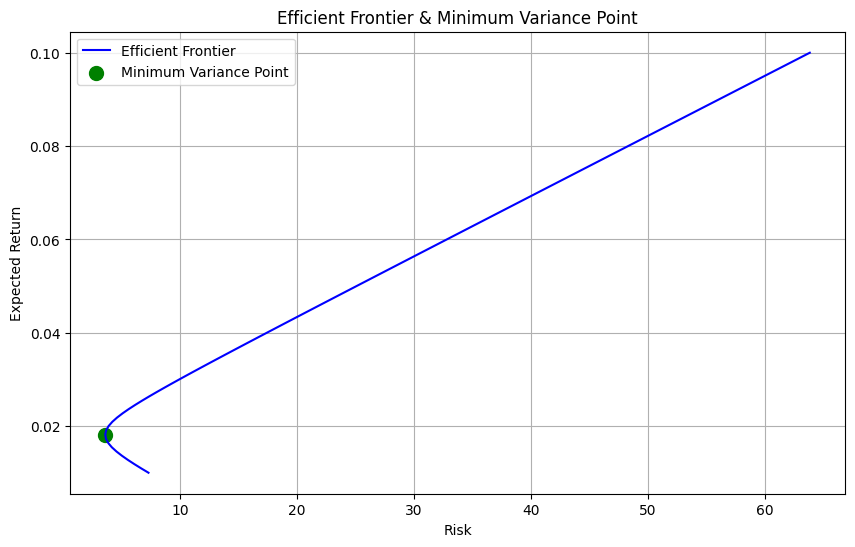

In [93]:
plt.figure(figsize=(10,6))
plt.plot(risk_values,vals,color='blue',linestyle='-',label="Efficient Frontier")
plt.scatter(min_risk,min_return,color='green',s=100,label="Minimum Variance Point")
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier & Minimum Variance Point')
plt.grid(True)
plt.legend()
plt.show()

In [94]:
print("Min Variance Point")
print(f"Return:{min_return}")
print(f"Risk:{min_risk}")

Min Variance Point
Return:0.01818181818181818
Risk:3.571187811641619
